# Importing some modules

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

tf.keras.backend.set_floatx('float64')
tf.random.set_seed(1)
np.random.seed(1)

# Retrieving data

In [2]:
from example import X, y

print('data shape:', X.shape, y.shape)

data shape: (1000, 1) (1000,)


## Reshape data for LSTM cell

In [3]:
X = X.reshape(-1, 1, 1)  # why this shape?

In [4]:
# splitting the dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)
X_train.shape, y_test.shape

((670, 1, 1), (330,))

# Build the model

In [5]:
model = Sequential()

model.add(LSTM(10, return_sequences=True))

# final layer: a neuron with linear activation acts like a summation operator.
model.add(Dense(1))

opt = optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError(name='loss')

model.compile(optimizer=opt, loss=loss, metrics=['mae'])

In [6]:
# training options

# https://keras.io/api/callbacks/early_stopping/
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,
                               restore_best_weights=True)

# fit options
params = dict(epochs=100,
              batch_size=2,
              verbose=2,
              validation_split=0.2,
              callbacks=[early_stopping])

In [7]:
# train the model

history = model.fit(X_train, y_train, **params)

Epoch 1/100
268/268 - 3s - loss: 14.0112 - mae: 2.4742 - val_loss: 10.0838 - val_mae: 2.1887
Epoch 2/100
268/268 - 0s - loss: 11.3126 - mae: 2.2619 - val_loss: 7.7157 - val_mae: 2.0049
Epoch 3/100
268/268 - 0s - loss: 8.8889 - mae: 2.0990 - val_loss: 6.1181 - val_mae: 1.8905
Epoch 4/100
268/268 - 0s - loss: 7.5621 - mae: 2.0652 - val_loss: 5.4859 - val_mae: 1.8778
Epoch 5/100
268/268 - 0s - loss: 6.9845 - mae: 2.0536 - val_loss: 5.1940 - val_mae: 1.8763
Epoch 6/100
268/268 - 1s - loss: 6.6529 - mae: 2.0515 - val_loss: 5.0095 - val_mae: 1.8649
Epoch 7/100
268/268 - 1s - loss: 6.4040 - mae: 2.0308 - val_loss: 4.8246 - val_mae: 1.8377
Epoch 8/100
268/268 - 1s - loss: 6.1484 - mae: 1.9933 - val_loss: 4.6358 - val_mae: 1.8109
Epoch 9/100
268/268 - 1s - loss: 5.8940 - mae: 1.9552 - val_loss: 4.4392 - val_mae: 1.7778
Epoch 10/100
268/268 - 1s - loss: 5.6250 - mae: 1.9181 - val_loss: 4.2155 - val_mae: 1.7308
Epoch 11/100
268/268 - 0s - loss: 5.3573 - mae: 1.8713 - val_loss: 3.9980 - val_mae: 1

268/268 - 1s - loss: 0.0448 - mae: 0.1398 - val_loss: 0.0309 - val_mae: 0.1312
Epoch 91/100
268/268 - 0s - loss: 0.0432 - mae: 0.1363 - val_loss: 0.0368 - val_mae: 0.1372
Epoch 92/100
268/268 - 0s - loss: 0.0438 - mae: 0.1378 - val_loss: 0.0262 - val_mae: 0.1219
Epoch 93/100
268/268 - 0s - loss: 0.0407 - mae: 0.1353 - val_loss: 0.0255 - val_mae: 0.1210
Epoch 94/100
268/268 - 0s - loss: 0.0399 - mae: 0.1330 - val_loss: 0.0329 - val_mae: 0.1380
Epoch 95/100
268/268 - 1s - loss: 0.0394 - mae: 0.1311 - val_loss: 0.0310 - val_mae: 0.1304
Epoch 96/100
268/268 - 0s - loss: 0.0385 - mae: 0.1332 - val_loss: 0.0304 - val_mae: 0.1270
Epoch 97/100
268/268 - 1s - loss: 0.0386 - mae: 0.1301 - val_loss: 0.0296 - val_mae: 0.1270
Epoch 98/100
268/268 - 0s - loss: 0.0356 - mae: 0.1262 - val_loss: 0.0223 - val_mae: 0.1123
Epoch 99/100
268/268 - 1s - loss: 0.0378 - mae: 0.1288 - val_loss: 0.0298 - val_mae: 0.1298
Epoch 100/100
268/268 - 1s - loss: 0.0344 - mae: 0.1251 - val_loss: 0.0240 - val_mae: 0.1195


# Model accuracy with MAE

In [8]:
p = model.predict(X_test).flatten()
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy()

p = model.predict(X_train).flatten()
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy()

print('MAE for training set: %.2e' % mae_train)
print('MAE for test     set: %.2e' % mae_test)

MAE for training set: 1.23e-01
MAE for test     set: 1.48e-01


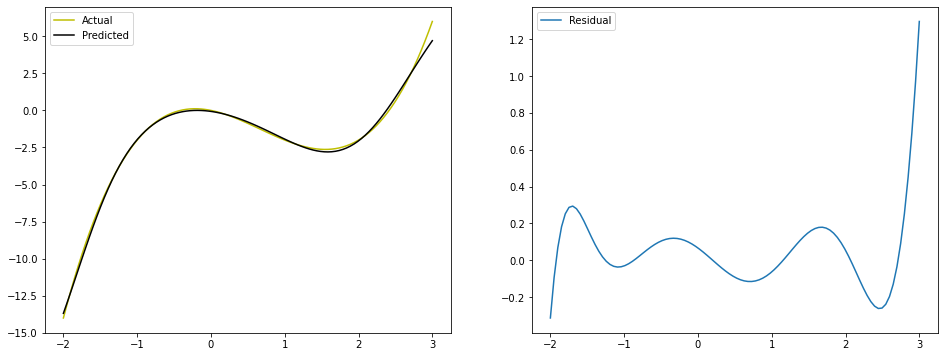

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

from example import a, b, f

xx = np.linspace(a, b, 100)
yy = f(xx)
pp = model.predict(xx.reshape(-1, 1, 1)).flatten()

ax1.plot(xx, yy, 'y-', label='Actual')
ax1.plot(xx, pp, 'k-', label='Predicted')
# ax1.plot(X_train, y_train, 'rx', label='Train data', markersize=1)
# ax1.plot(X_test, y_test, 'bo', label='Test data', markersize=1)

ax2.plot(xx, yy - pp, label='Residual')

ax1.legend()
ax2.legend()

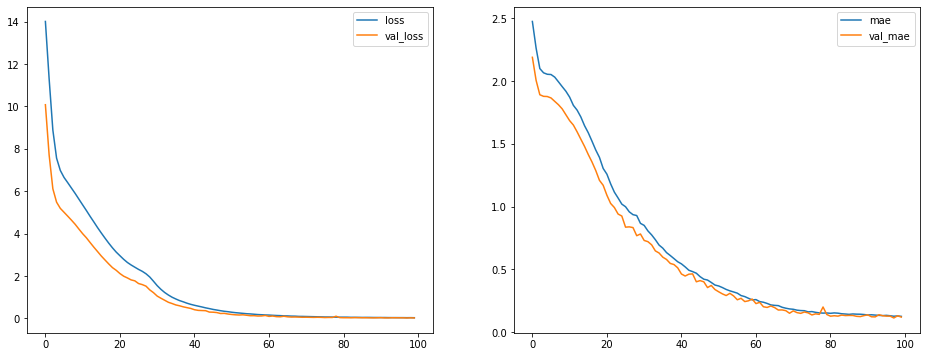

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

ax1.plot((loss), label='loss')
ax1.plot((val_loss), label='val_loss')
ax1.legend()

ax2.plot((mae), label='mae')
ax2.plot((val_mae), label='val_mae')
ax2.legend()

# Test the model on a long interval

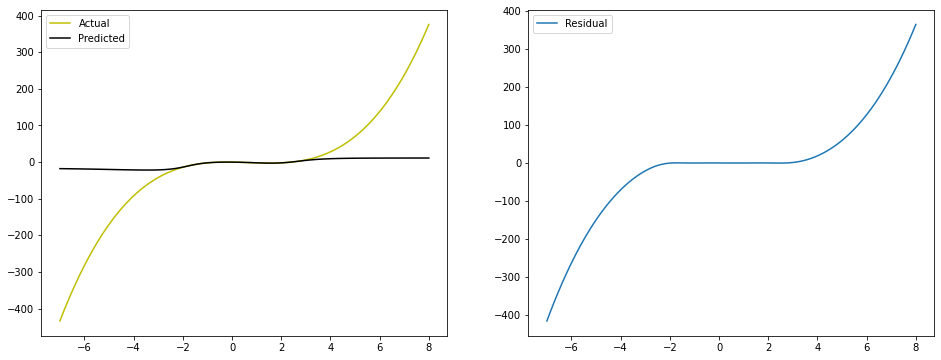

In [11]:
# Extrapolation test

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

xx = np.linspace(a - (b - a), b + (b - a), 100)
yy = f(xx)
pp = model.predict(xx.reshape(-1, 1, 1)).flatten()

ax1.plot(xx, yy, 'y-', label='Actual')
ax1.plot(xx, pp, 'k-', label='Predicted')

ax2.plot(xx, yy - pp, label='Residual')

ax1.legend()
ax2.legend()